In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

ops_path = {'DAS': '../logsTest/operation.csv', 'DASDHT': '../logsDHT/operation.csv','DASDHT2': '../logsDHT2/operation.csv'}
msgs_path = {'DAS': '../logsTest/messages.csv','DASDHT': '../logsDHT/messages.csv','DASDHT2': '../logsDHT2/messages.csv'}

builder_address = '83814183170291850251680823880522715558189094423550585243365458794131648333116'

op_df={}
msg_df={}
for key in ops_path:
    op_df[key] = pd.read_csv(ops_path[key],index_col=False,low_memory=False)
for key in msgs_path:
    msg_df[key] = pd.read_csv(msgs_path[key],index_col=False,low_memory=False)


Text(0.5, 0, 'Node id')

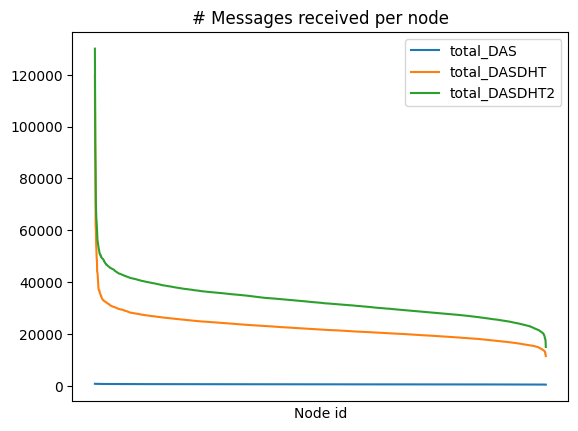

In [75]:
fig1, ax1 = plt.subplots()

for key in msg_df:
    #print(key)
    msg_types = msg_df[key]['type'].unique()
    msg_df2 = msg_df[key].loc[(msg_df[key]['dst'] != builder_address)]

    #for types in msg_types:
        #print(types)
    #    df2 = msg_df2.loc[(msg_df2['type'] == types)]
    #    df2['dst'].value_counts().plot(ax=ax1, kind='line', xticks=[], title="Message received by node", label=types+'_'+key)
        #print(df2['dst'].value_counts())
    msg_df2['dst'].value_counts().plot(ax=ax1, kind='line', xticks=[], title="Message received by node", label='total_'+key)

ax1.legend()

ax1.set_title("# Messages received per node")
ax1.set_xlabel("Node id")

Text(0.5, 0, 'Time')

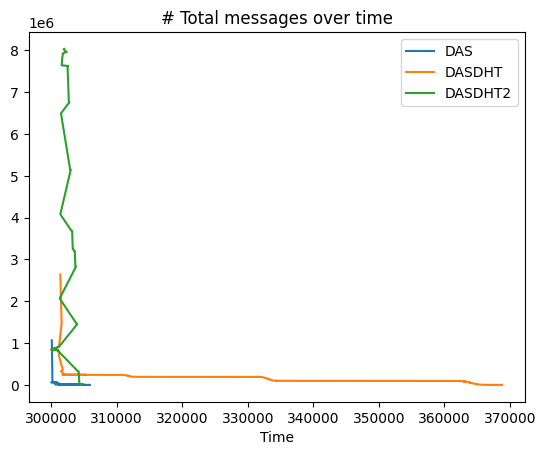

In [81]:
fig1, ax1 = plt.subplots()

for key in msg_df:
    msg_addr = msg_df[key]['dst'].unique()
    msg_df2 = msg_df[key].loc[(msg_df[key]['dst'] != builder_address)]

    msg_df2['time'].value_counts().plot(ax=ax1,title="Total msgs received", label=key)

ax1.legend()

ax1.set_title("# Total messages over time")
ax1.set_xlabel("Time")

Text(0.5, 1.0, '# Total messages per type')

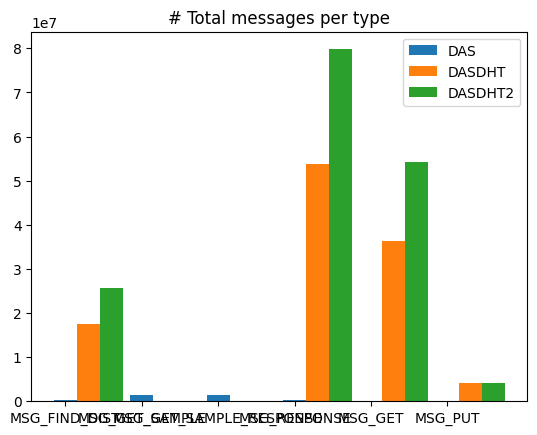

In [82]:
fig2, ax2 = plt.subplots()


i=0

tables=['MSG_FIND_DIST','MSG_GET_SAMPLE','MSG_GET_SAMPLE_RESPONSE','MSG_RESPONSE','MSG_GET','MSG_PUT']
width=0.3
for key in msg_df:
    table={}
    for type in tables:
        table[type]= len(msg_df[key].loc[(msg_df[key]['type'] == type)])
        
    
    ax2.bar(np.arange(len(tables))+width*i,table.values(),width=width,label=key)
    ticks = tables
    ax2.set_xticks(range(len(ticks)))
    ax2.set_xticklabels(ticks)
    i=i+1
ax2.legend()
ax2.set_title("# Total messages per type")


Text(0.5, 0, 'Operation complete time (ms)')

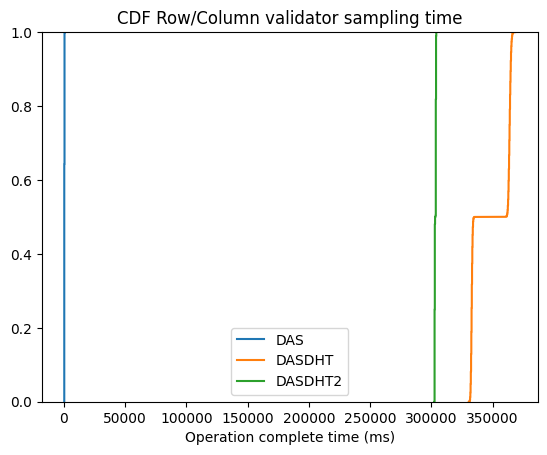

In [83]:
fig3, ax3 = plt.subplots()


for key in op_df:

    vsdf = op_df[key].loc[(op_df[key]['type'] == 'ValidatorSamplingOperation')]
    #print(vsdf['completion_time'].median())
    #print(vsdf)
    #n, bins, patches = ax3.hist(vsdf['completion_time'], n_bins, density=True, histtype='step',
     #                          cumulative=True, label='Empirical')

    # sort the data in ascending order
    x = np.sort(vsdf['completion_time'])
    N = vsdf['completion_time'].count()
    # get the cdf values of y
    y = np.arange(N) / float(N)

    ax3.plot(x, y,label=key)

#ax3.set_xlim([0,4000])
ax3.legend()
ax3.set_ylim([0,1])
ax3.set_title("CDF Row/Column validator sampling time")
ax3.set_xlabel("Operation complete time (ms)")

Text(0.5, 0, '# hops')

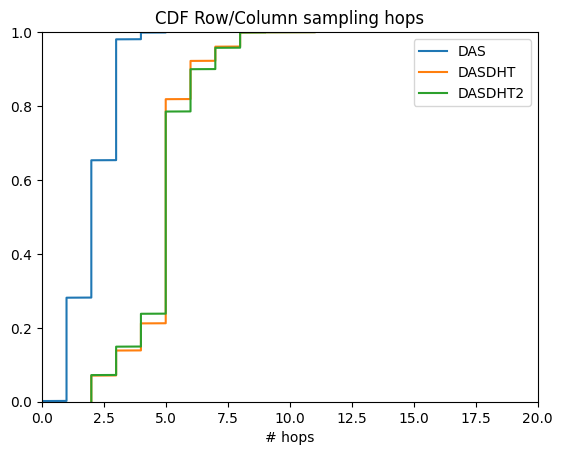

In [84]:
fig8, ax8 = plt.subplots()

for key in op_df:

    vsdf = op_df[key].loc[(op_df[key]['type'] == 'ValidatorSamplingOperation')]

    x = np.sort(vsdf['hops'])
    N = vsdf['hops'].count()
    # get the cdf values of y
    y = np.arange(N) / float(N)

    ax8.plot(x, y,label=key)

ax8.legend()
ax8.set_xlim([0,20])
ax8.set_ylim([0,1])

ax8.set_title("CDF Row/Column sampling hops")
ax8.set_xlabel("# hops")

Text(0.5, 0, 'Operation complete time (ms)')

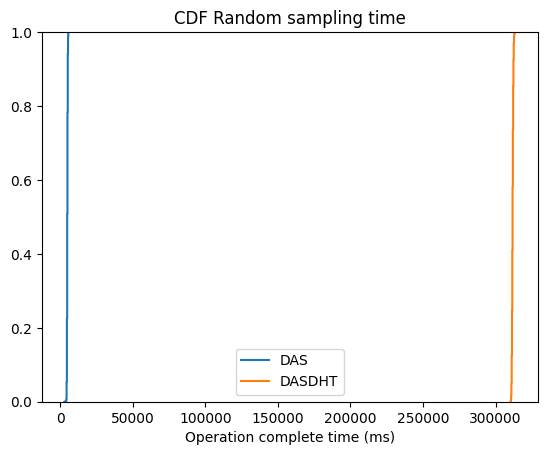

In [68]:
fig4, ax4 = plt.subplots()

for key in op_df:

    rsdf = op_df[key].loc[(op_df[key]['type'] == 'RandomSamplingOperation')]

    x = np.sort(rsdf['completion_time'])
    N = rsdf['completion_time'].count()
    # get the cdf values of y
    y = np.arange(N) / float(N)

    ax4.plot(x, y,label=key)

ax4.legend()
#ax4.set_xlim([0,8000])
ax4.set_ylim([0,1])

ax4.set_title("CDF Random sampling time")
ax4.set_xlabel("Operation complete time (ms)")

Text(0.5, 0, '# hops')

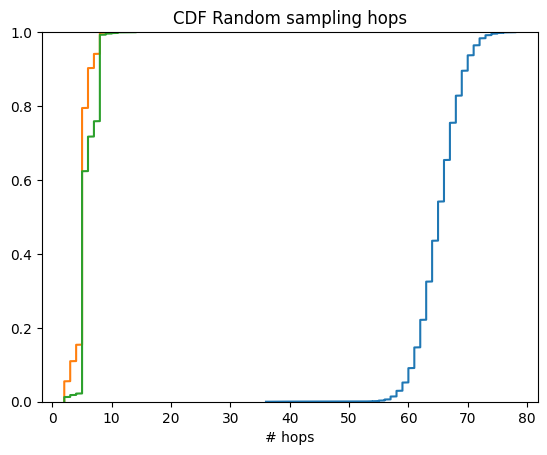

In [85]:
fig9, ax9 = plt.subplots()

for key in op_df:

    #n_bins = 100
    rsdf = op_df[key].loc[(op_df[key]['type'] == 'RandomSamplingOperation')]
    #print(op_df)
    #print(vsdf['hops'].mode())
    #n, bins, patches = ax9.hist(vsdf['hops'], n_bins, density=True, histtype='step',
    #                           cumulative=True, label='Empirical')
    x = np.sort(rsdf['hops'])
    N = rsdf['hops'].count()
    # get the cdf values of y
    y = np.arange(N) / float(N)

    ax9.plot(x, y,label=key)

ax9.legend
#ax9.set_xlim([0,500])
ax9.set_ylim([0,1])

ax9.set_title("CDF Random sampling hops")
ax9.set_xlabel("# hops")

Text(0.5, 0, 'Number of samples obtained')

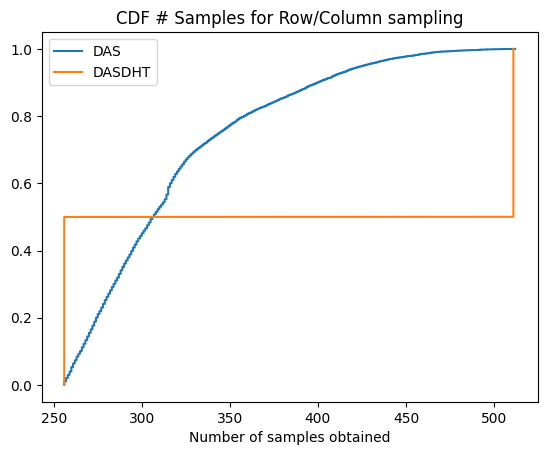

In [70]:
fig6, ax6 = plt.subplots()

for key in op_df:

    vsdf = op_df[key].loc[(op_df[key]['type'] == 'ValidatorSamplingOperation')]

    x = np.sort(vsdf['samples'])
    N = vsdf['samples'].count()
    # get the cdf values of y
    y = np.arange(N) / float(N)
    ax6.plot(x, y,label=key)

#ax6.set_xlim([0,4000])
ax6.legend()
ax6.set_title("CDF # Samples for Row/Column sampling")
ax6.set_xlabel("Number of samples obtained")

Text(0.5, 0, 'Number of samples obtained')

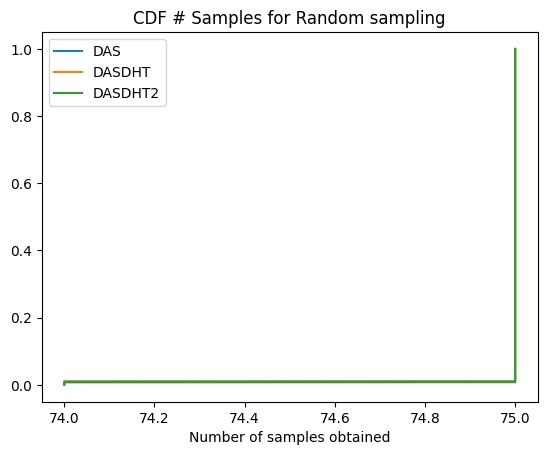

In [80]:
fig7, ax7 = plt.subplots()

for key in op_df:

    rsdf = op_df[key].loc[(op_df[key]['type'] == 'RandomSamplingOperation')]

    x = np.sort(rsdf['samples'])
    N = rsdf['samples'].count()
    # get the cdf values of y
    y = np.arange(N) / float(N)
    ax7.plot(x, y,label=key)

#ax6.set_xlim([0,4000])
ax7.legend()
ax7.set_title("CDF # Samples for Random sampling")
ax7.set_xlabel("Number of samples obtained")